# Day 1 - Exploratory Data Analysis (EDA)

This notebook explores the **Credit Card Fraud Detection dataset** from Kaggle.  
Goal: Understand dataset structure, fraud distribution, and basic feature properties before augmentation.

---

In [1]:
%pip install -e ../../..

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
# adjust path so Python can find the package under src/
sys.path.append(os.path.abspath("src"))  # adjust path to project root if needed

from daredev_fraud.data_ingestion import load_fraud_dataset  # If your package folder is daredev_fraud

# If your package folder is daredev-fraud, use:
# from daredev_fraud.data_ingestion import load_fraud_dataset

# Keep plots styled
sns.set(style="whitegrid")

# 1. Load dataset
df = load_fraud_dataset()

Obtaining file:///Users/nxwright/Documents/projects-2025/fraud-signal-detector-augmented-producer
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for daredev-fraud (pyproject.toml) ... done
  Created wheel for daredev-fraud: filename=daredev_fraud-0.1.0-0.editable-py3-none-any.whl size=1380 sha256=82e24839afdabe327b6a3c61ee6d71286c9c71455f7e309dc28352185ce456fc
  Stored in directory: /private/var/folders/nw/m0ts20q954scn_w__5zjn2fm0000gn/T/pip-ephem-wheel-cache-z7mvghrz/wheels/f7/bd/a4/2950e1410ebfd8d3df4a1804cca862dc5ac96aa0a2d2a8b63c
Successfully built daredev-fraud
  Attempting uninstall: daredev-fraud
    Found existing installation: daredev-fraud 0.1.0
    Uninstalling daredev-fraud-0.1.0:
      Successfully uninstalled daredev-fraud-0.1.0
Note: you may need to restart the kernel to use updated packages.

### 1. Dataset Overview

We start by checking the shape, columns, and datatypes of the dataset.  
This ensures we understand the raw structure before moving forward.

In [2]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes.value_counts())
print("\nMissing values:\n", df.isnull().sum())

Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Dtypes:
 float64    30
int64       1
Name: count, dtype: int64

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 2. Fraud Distribution

The target column is **Class**:  
- `0` → Not Fraud  
- `1` → Fraud  

Let’s check how imbalanced the dataset is.

Counts:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentages:
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


/var/folders/nw/m0ts20q954scn_w__5zjn2fm0000gn/T/ipykernel_88080/1859954476.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


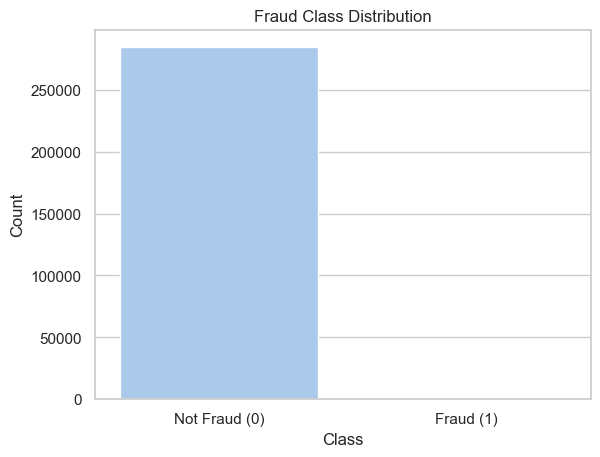

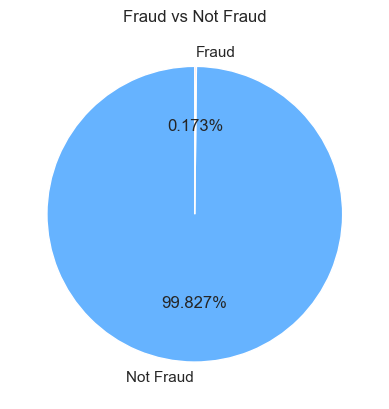

In [3]:
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

print("Counts:\n", class_counts)
print("\nPercentages:\n", class_percent)

# Bar plot
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.xticks([0,1], ['Not Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.title("Fraud Class Distribution")
plt.show()

# Pie chart
plt.pie(class_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.3f%%', startangle=90, colors=["#66b3ff","#ff9999"])
plt.title("Fraud vs Not Fraud")
plt.show()


## 3. Descriptive Statistics

We’ll generate summary statistics to spot unusual ranges or outliers, especially in `Amount` and the PCA features (`V1`–`V28`).


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 4. Correlation Heatmap

Finally, let’s visualize correlations between features.  
This can hint at which features may carry strong signals for fraud.

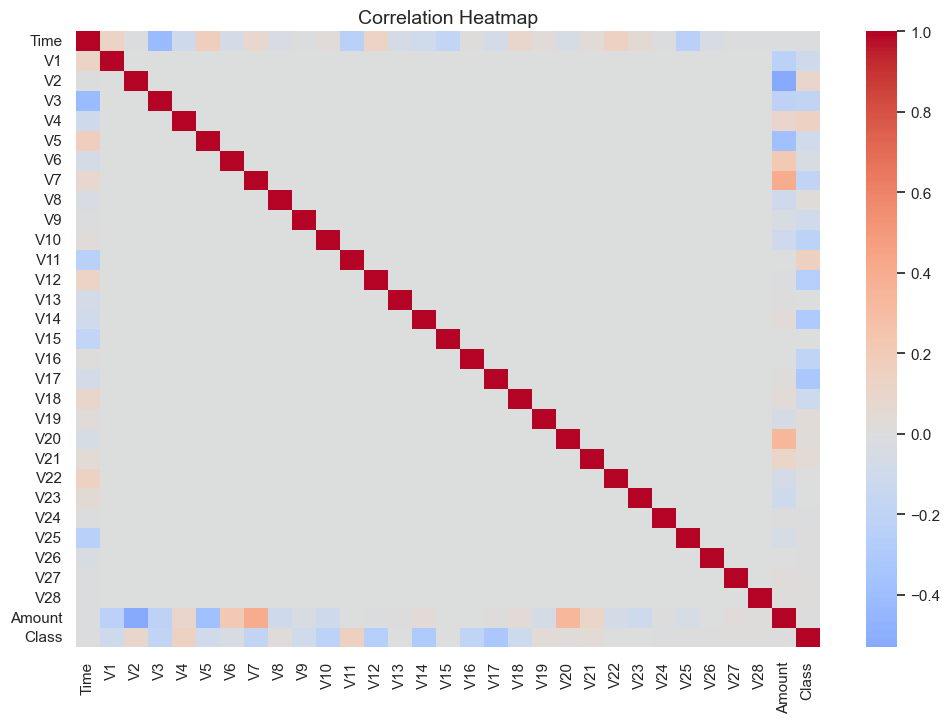

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

---
# Findings (Day 1)

- Dataset contains ~285k transactions, with 492 fraud cases (**0.17% fraud**).  
- No missing values detected.  
- Features are mostly PCA-transformed (`V1–V28`), plus `Time`, `Amount`, and target `Class`.  
- Class imbalance is extreme → augmentation will be required before modeling.  
- Some features (like `V14`, `V17`) show higher correlation with `Class`.  

✅ Next Step (Day 2): Begin **data augmentation** with Faker and resampling strategies to balance fraud vs non-fraud.